# Generate figure 3
Figure 3 describes the results of all of our ART driven DBTL cycles.

- 3A: Schematic of ART process (not included here)
- 3B: Titer violin plot
- 3C: Normalized dCas9 violin plot
- 3D: % of strains passing filters
Other information:
- ART performance per cycle
- Identity of best strains
- Proteomics clustering

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('df_target_all_TEST.csv', index_col = 0)
df
df['line_name_cycle'] = df.apply(lambda x: f"{x['line_name_norep']}-C{x['cycle']}" , axis = 1)

In [3]:

'abdc' in 'abcdef'

False

In [4]:
logical_list_loop = []
for single_line_name in df['Line Name']:
    logical_list_loop.append('PP_1506' in single_line_name)

In [5]:
logical_list_comprehension = ['PP_1506' in single_line_name for single_line_name in df['Line Name']]

<Axes: xlabel='number_of_grna', ylabel='isoprenol'>

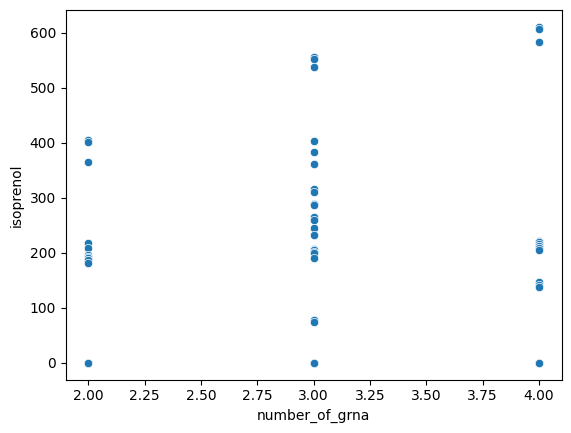

In [6]:
sns.scatterplot(
    data=df.loc[(
        (np.array(['PP_1506' in single_line_name for single_line_name in df['Line Name']])) & 
        (df['cycle'] == 6))
    ,:
    ],
    x ='number_of_grna',
    y = 'isoprenol'
)

<Axes: xlabel='number_of_grna', ylabel='isoprenol'>

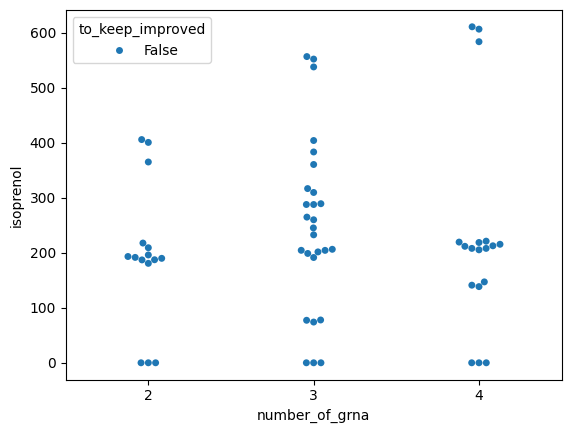

In [7]:
sns.swarmplot(
    data=df.loc[(
        (np.array(['PP_1506' in single_line_name for single_line_name in df['Line Name']])) & 
        (df['cycle'] == 6))
    ,:
    ],
    x ='number_of_grna',
    y = 'isoprenol',
    hue = 'to_keep_improved'
)

In [8]:
# np.where(
#     df.loc[df['has_1506'], [f'target_{i}' for i in [1,2,3,4]]] == 'PP_1506')


In [9]:
df['has_1506'] = ['PP_1506' in single_line_name for single_line_name in df['Line Name']]
df.loc[df['has_1506'], '1506_position'] = np.where(
    df.loc[df['has_1506'], [f'target_{i}' for i in [1,2,3,4]]] == 'PP_1506')[1]

In [10]:
df['1506_downreg'] = None
for idx, row in df[df['has_1506']].iterrows():
    current_target_location = row['1506_position']
    column_to_look_at = f'target_{int(current_target_location+1)}_norm'
    df.loc[idx, '1506_downreg'] = row[column_to_look_at]

In [11]:
df[df['has_1506']]

,Line Name,cycle,is_control,line_name_norep,number_of_grna,isoprenol,dCas9,dCas9_normtocontrol,target_1,target_2,...,target_4_belowthresh,all_targets_belowthresh,all_reps_belowthresh,all_reps_above_dcas9_thresh,to_keep,to_keep_improved,line_name_cycle,has_1506,1506_position,1506_downreg
147,PP_1506-R1,0,False,PP_1506,1,253.56809,457897.03,0.057945,PP_1506,NaN,...,False,False,False,False,NaN,True,PP_1506-C0,True,0.0,0.596278
148,PP_1506-R2,0,False,PP_1506,1,225.75831,322219.78,0.040776,PP_1506,NaN,...,False,False,False,False,NaN,True,PP_1506-C0,True,0.0,0.67079
149,PP_1506-R3,0,False,PP_1506,1,221.39902,617702.20,0.078168,PP_1506,NaN,...,False,False,False,False,NaN,True,PP_1506-C0,True,0.0,0.628637
423,PP_0658_PP_1506_PP_3071-R1,1,False,PP_0658_PP_1506_PP_3071,3,175.38490,3266427.50,0.377428,PP_0658,PP_1506,...,False,False,False,True,0.0,False,PP_0658_PP_1506_PP_3071-C1,True,1.0,0.995704
431,PP_0658_PP_1506_PP_3071-R2,1,False,PP_0658_PP_1506_PP_3071,3,182.48860,4104907.62,0.474313,PP_0658,PP_1506,...,False,False,False,True,0.0,False,PP_0658_PP_1506_PP_3071-C1,True,1.0,1.006043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,PP_0813_PP_0815_PP_1506-R2,6,False,PP_0813_PP_0815_PP_1506,3,0.00000,669708.80,0.044699,PP_0813,PP_0815,...,False,False,False,False,0.0,False,PP_0813_PP_0815_PP_1506-C6,True,2.0,2.562674
1502,PP_0813_PP_0815_PP_1506-R3,6,False,PP_0813_PP_0815_PP_1506,3,0.00000,476134.40,0.031779,PP_0813,PP_0815,...,False,False,False,False,0.0,False,PP_0813_PP_0815_PP_1506-C6,True,2.0,2.546653
1503,PP_1506_PP_4120-R1,6,False,PP_1506_PP_4120,2,0.00000,0.00,0.000000,PP_1506,PP_4120,...,False,False,False,False,0.0,False,PP_1506_PP_4120-C6,True,0.0,0.604514
1504,PP_1506_PP_4120-R2,6,False,PP_1506_PP_4120,2,0.00000,0.00,0.000000,PP_1506,PP_4120,...,False,True,False,False,0.0,False,PP_1506_PP_4120-C6,True,0.0,0.452216


<Axes: xlabel='isoprenol', ylabel='1506_downreg'>

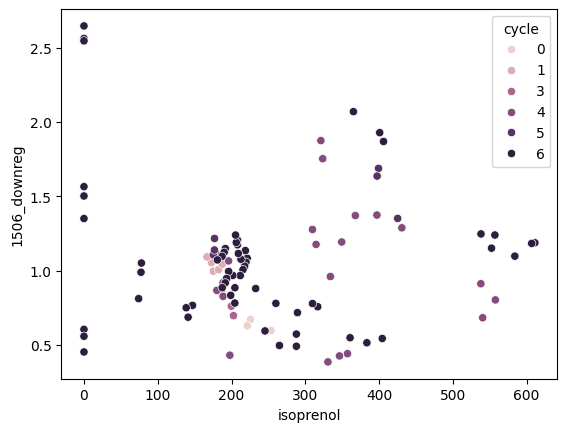

In [12]:
sns.scatterplot(
    df[df['has_1506']],
    x = 'isoprenol',
    y = '1506_downreg',
    hue = 'cycle'
)

<Axes: xlabel='cycle', ylabel='1506_downreg'>

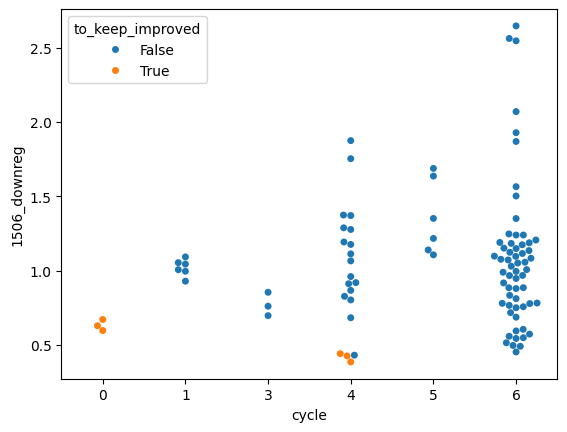

In [13]:
sns.swarmplot(
    df[df['has_1506']],
    x = 'cycle',
    y = '1506_downreg',
    hue = 'to_keep_improved'
)

<Axes: xlabel='1506_downreg', ylabel='Count'>

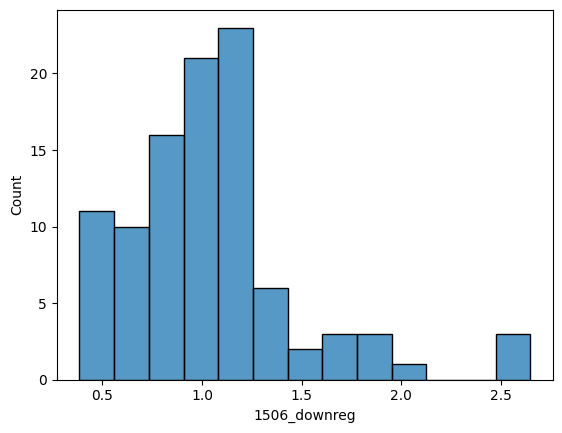

In [14]:
sns.histplot(
    df[df['has_1506']],
    x = '1506_downreg'
)
    

In [15]:
df.loc[df['has_1506'], [f'target_{i}' for i in [1,2,3,4]]]

,target_1,target_2,target_3,target_4
147,PP_1506,NaN,NaN,NaN
148,PP_1506,NaN,NaN,NaN
149,PP_1506,NaN,NaN,NaN
423,PP_0658,PP_1506,PP_3071,NaN
431,PP_0658,PP_1506,PP_3071,NaN
...,...,...,...,...
1501,PP_0813,PP_0815,PP_1506,NaN
1502,PP_0813,PP_0815,PP_1506,NaN
1503,PP_1506,PP_4120,NaN,NaN
1504,PP_1506,PP_4120,NaN,NaN


In [16]:
df.loc[df['has_1506'], [f'target_{i}' for i in [1,2,3,4]]] == 'PP_1506'

,target_1,target_2,target_3,target_4
147,True,False,False,False
148,True,False,False,False
149,True,False,False,False
423,False,True,False,False
431,False,True,False,False
...,...,...,...,...
1501,False,False,True,False
1502,False,False,True,False
1503,True,False,False,False
1504,True,False,False,False


In [17]:
df.loc[
(np.array(['PP_1506' in single_line_name for single_line_name in df['Line Name']])) & 
(df['cycle'] == 6)
, :
]


,Line Name,cycle,is_control,line_name_norep,number_of_grna,isoprenol,dCas9,dCas9_normtocontrol,target_1,target_2,...,target_4_belowthresh,all_targets_belowthresh,all_reps_belowthresh,all_reps_above_dcas9_thresh,to_keep,to_keep_improved,line_name_cycle,has_1506,1506_position,1506_downreg
1339,PP_0812_PP_0813_PP_0815_PP_1506-R1,6,False,PP_0812_PP_0813_PP_0815_PP_1506,4,611.1875,8670414.40,0.578703,PP_0812,PP_0813,...,False,False,False,True,1.0,False,PP_0812_PP_0813_PP_0815_PP_1506-C6,True,3.0,1.187255
1340,PP_0812_PP_0813_PP_0815_PP_1506-R3,6,False,PP_0812_PP_0813_PP_0815_PP_1506,4,606.8789,8941632.80,0.596806,PP_0812,PP_0813,...,False,False,False,True,1.0,False,PP_0812_PP_0813_PP_0815_PP_1506-C6,True,3.0,1.183079
1343,PP_0812_PP_0813_PP_0815_PP_1506-R2,6,False,PP_0812_PP_0813_PP_0815_PP_1506,4,584.0290,10354285.10,0.691092,PP_0812,PP_0813,...,False,False,False,True,1.0,False,PP_0812_PP_0813_PP_0815_PP_1506-C6,True,3.0,1.097274
1345,PP_0812_PP_0815_PP_1506-R3,6,False,PP_0812_PP_0815_PP_1506,3,557.0017,7638335.60,0.509818,PP_0812,PP_0815,...,False,False,False,True,1.0,False,PP_0812_PP_0815_PP_1506-C6,True,2.0,1.239538
1346,PP_0812_PP_0815_PP_1506-R1,6,False,PP_0812_PP_0815_PP_1506,3,552.4389,7028652.40,0.469124,PP_0812,PP_0815,...,False,False,False,True,1.0,False,PP_0812_PP_0815_PP_1506-C6,True,2.0,1.150925
1348,PP_0812_PP_0815_PP_1506-R2,6,False,PP_0812_PP_0815_PP_1506,3,538.1355,10596137.10,0.707235,PP_0812,PP_0815,...,False,False,False,True,1.0,False,PP_0812_PP_0815_PP_1506-C6,True,2.0,1.246837
1372,PP_0812_PP_1506-R1,6,False,PP_0812_PP_1506,2,406.0365,9691139.50,0.646831,PP_0812,PP_1506,...,False,False,False,True,0.0,False,PP_0812_PP_1506-C6,True,1.0,1.869301
1373,PP_0815_PP_1506_PP_4189-R3,6,False,PP_0815_PP_1506_PP_4189,3,404.3060,27225159.10,1.817132,PP_0815,PP_1506,...,False,False,False,True,1.0,False,PP_0815_PP_1506_PP_4189-C6,True,1.0,0.542987
1375,PP_0812_PP_1506-R2,6,False,PP_0812_PP_1506,2,400.8658,9573343.00,0.638969,PP_0812,PP_1506,...,False,False,False,True,0.0,False,PP_0812_PP_1506-C6,True,1.0,1.928576
1381,PP_0815_PP_1506_PP_4189-R1,6,False,PP_0815_PP_1506_PP_4189,3,383.4839,20172558.00,1.346409,PP_0815,PP_1506,...,False,False,False,True,1.0,False,PP_0815_PP_1506_PP_4189-C6,True,1.0,0.514071


In [18]:
cycle_labels = [
    'DBTL0: Initial cycle',
    'DBTL1: Pseudorandom\n2x and 3x combinations',
    'DBTL2: ART designs\nfrom DBTL0-1',
    'DBTL3: DBTL2 repeat with\nimproved dCas9 plasmid',
    'DBTL4: ART designs\nfrom DBTL3',
    'DBTL5: ART designs\nfrom DBTL3-4',
    'DBTL6: ART designs\nfrom DBTL3-5'
]
cycle_label_dict = {i:cycle_labels[i] for i in [0,1,2,3,4,5,6]}
df['cycle_label'] = df['cycle'].apply(lambda x: cycle_label_dict[x])

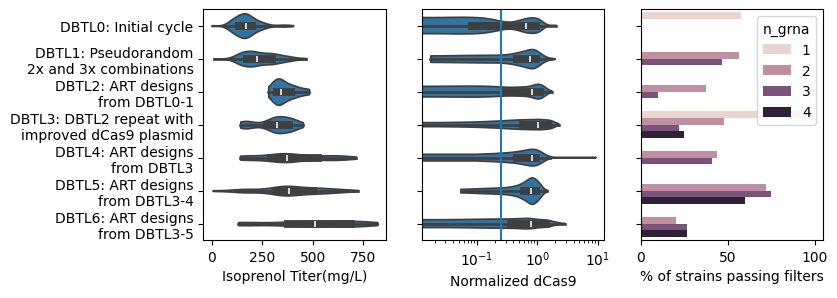

In [19]:
fig, ax = plt.subplots(
    ncols=3,
    nrows=1,
    figsize = (8, 3),
    sharey = True
)

# sns.violinplot(
#     data=df[df['to_keep_improved']],
#     x = 'isoprenol',
#     y = 'cycle_label',
#     orient = 'h',
#     cut = 0,
#     ax = ax[0],
# )

sns.violinplot(
    data=df[(df['to_keep_improved']) & (df['cycle'] >-1)],
    x = 'isoprenol',
    y = 'cycle_label',
    orient = 'h',
    cut = 0,
    ax = ax[0],
)


sns.violinplot(data = df,
    x = 'dCas9_normtocontrol',
    y = 'cycle_label',
    orient = 'h',
    cut = 0,
    ax = ax[1],
)           
ax[1].set_xscale('log')
ax[1].axvline(0.25)

cycle_list = []
n_grna_list = []
n_passing_list = []
n_total_list = []
for cycle in df['cycle'].unique():
    dfc = df[(df['cycle'] == cycle) & ~(df['is_control'])]
    for n in dfc['number_of_grna'].unique():
        n_passing = sum(dfc.loc[(dfc['number_of_grna'] == n), 'to_keep_improved'])
        n_total = len(dfc.loc[(dfc['number_of_grna'] == n), 'to_keep_improved'])
        cycle_list.append(cycle)
        n_grna_list.append(n)
        n_passing_list.append(n_passing)
        n_total_list.append(n_total)
df_pct_passing = pd.DataFrame.from_dict(
    {
        'cycle': cycle_list,
        'n_grna': n_grna_list,
        'n_passing': n_passing_list,
        'n_total': n_total_list
    }
)
df_pct_passing['pct_passing'] = 100 * df_pct_passing['n_passing']/df_pct_passing['n_total']
df_pct_passing['cycle_label'] = df_pct_passing['cycle'].apply(lambda x: cycle_label_dict[x])
sns.barplot(
    data = df_pct_passing,
    x = 'pct_passing', 
    y = 'cycle_label',
    hue = 'n_grna',
    orient='h'
)
ax[0].set_ylabel('')

x_labels = [
    'Isoprenol Titer(mg/L)',
    'Normalized dCas9',
    '% of strains passing filters'
]
for a, xl in zip(ax, x_labels):
    a.set_xlabel(xl)

In [20]:
df_pct_passing

,cycle,n_grna,n_passing,n_total,pct_passing,cycle_label
0,0,1,216,375,57.600000,DBTL0: Initial cycle
1,1,3,42,90,46.666667,DBTL1: Pseudorandom\n2x and 3x combinations
2,1,2,51,90,56.666667,DBTL1: Pseudorandom\n2x and 3x combinations
3,2,4,0,15,0.000000,DBTL2: ART designs\nfrom DBTL0-1
4,2,3,9,90,10.000000,DBTL2: ART designs\nfrom DBTL0-1
5,2,2,27,72,37.500000,DBTL2: ART designs\nfrom DBTL0-1
6,3,3,15,69,21.739130,DBTL3: DBTL2 repeat with\nimproved dCas9 plasmid
7,3,2,36,75,48.000000,DBTL3: DBTL2 repeat with\nimproved dCas9 plasmid
8,3,4,3,12,25.000000,DBTL3: DBTL2 repeat with\nimproved dCas9 plasmid
9,3,1,6,6,100.000000,DBTL3: DBTL2 repeat with\nimproved dCas9 plasmid


In [21]:
art_folders = [
    'dbtl1_art_outputs/',
    'dbtl2_art_outputs/',
    'dbtl3ONLY_art_outputs/',
    'dbtl4_art_outputs/',
    'dbtl5_art_outputs/',
    'dbtl6_art_outputs/'
]

In [22]:
art_cycles = [1,2,3,4,5, 6]
art_folders = [f'dbtl{i}_art_outputs/' for i in art_cycles]
art_folders[2] = 'dbtl3ONLY_art_outputs/'
df_column = '$R^2$'
df_row = 'Ensemble Model'
art_perf_df = pd.DataFrame.from_dict(
    {
        'folder': art_folders,
        'cycle': art_cycles,
        'name': [f'DBTL{i}' for i in art_cycles],
    }
)
art_perf_df[['r2', 'cv_r2']] = None
for idx, srs in art_perf_df.iterrows():
    if srs['cycle']==3:
        r2_df = pd.read_csv(f'{srs['folder']}metric0.csv', index_col = 0)
        r2_cv_df = pd.read_csv(f'{srs['folder']}cv_metric0.csv', index_col = 0)
    else:
        r2_df = pd.read_csv(f'{srs['folder']}metric_isoprenol.csv', index_col = 0)
        r2_cv_df = pd.read_csv(f'{srs['folder']}cv_metric_isoprenol.csv', index_col = 0)

    art_perf_df.loc[idx, 'Full'] = r2_df.loc[df_row, df_column]
    art_perf_df.loc[idx, '5-fold CV'] = r2_cv_df.loc[df_row, df_column]
art_perf_df_melt = pd.melt(art_perf_df, id_vars = 'name', value_vars = ['Full', '5-fold CV'],var_name='Dataset' )
art_perf_df_melt

,name,Dataset,value
0,DBTL1,Full,0.926077
1,DBTL2,Full,0.908956
2,DBTL3,Full,0.956492
3,DBTL4,Full,0.886727
4,DBTL5,Full,0.937853
5,DBTL6,Full,0.914799
6,DBTL1,5-fold CV,0.087274
7,DBTL2,5-fold CV,0.552922
8,DBTL3,5-fold CV,0.408193
9,DBTL4,5-fold CV,0.584166


Text(0, 0.5, '')

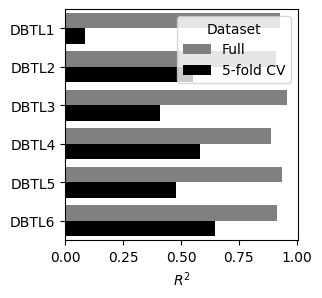

In [23]:
fig, ax = plt.subplots(figsize = (3,3))
sns.barplot(data = art_perf_df_melt, 
            y = 'name',
            x = 'value',
            hue = 'Dataset',
            palette=['gray', 'black']
           )
ax.set_xlabel(r'$R^2$')
ax.set_ylabel('')


## Set up full figure

In [28]:
image_location = './Figure 3A v1.png'
img = plt.imread(image_location)


# UPDATE THE PROPORTIONS OF THE FIGURE TO MATCH THE ILLUSTRATOR DIAGRAM

In [29]:
img.shape

(2038, 3804, 4)

In [24]:
def add_schematic_3A(ax = None, image_location = './Figure 3A v1.png'):
    if ax is None:
        fig, ax = plt.subplots()
    img = plt.imread(image_location)
    ax.imshow(img)
    ax.set_axis_off()
    
def add_titer_violin(df, ax = None):
    if ax is None:
        fig, ax = plt.subplots()
    sns.violinplot(
        data=df,
        x = 'isoprenol',
        y = 'cycle_label',
        orient = 'h',
        cut = 0,
        ax = ax,
        hue = 'to_keep_improved'
    )
    ax.set_xlabel('Titer (mg/L)')
    ax.set_title('Isoprenol Titer in passing\nand failing strains')
    ax.set_ylabel('')
    
def add_dcas9_violin(df, ax = None):
    sns.violinplot(data = df,
        x = 'dCas9_normtocontrol',
        y = 'cycle_label',
        orient = 'h',
        cut = 0,
        ax = ax,
    )  
    ax.set_xlabel('Normalized dCas9 counts')
    ax.set_title('dCas9 counts')
    ax.axvline(0.25)
    # ax.set_yticklabels([])
    ax.tick_params(labelleft=False)
    ax.set_ylabel('')
    
def add_filter_bargraph(ax = None):
    if ax is None:
        fig, ax = plt.subplots()
    sns.barplot(
        data = df_pct_passing,
        x = 'pct_passing', 
        y = 'cycle_label',
        hue = 'n_grna',
        orient='h',
        ax = ax
    )
    # ax.set_yticklabels([])
    ax.set_ylabel('')
    ax.tick_params(labelleft = False)
    ax.set_title('Filter passage\nby number of gRNA')
    ax.set_xlabel('% Passing')

def add_art_performance_bargraph(art_df, ax = None):
    if ax is None:
        fig, ax = plt.subplots()
    sns.barplot(data = art_perf_df_melt, 
                y = 'name',
                x = 'value',
                hue = 'Dataset',
                palette=['gray', 'black'],
                ax = ax
               )
    ax.set_xlabel(r"$R^2$")
    ax.set_ylabel('')


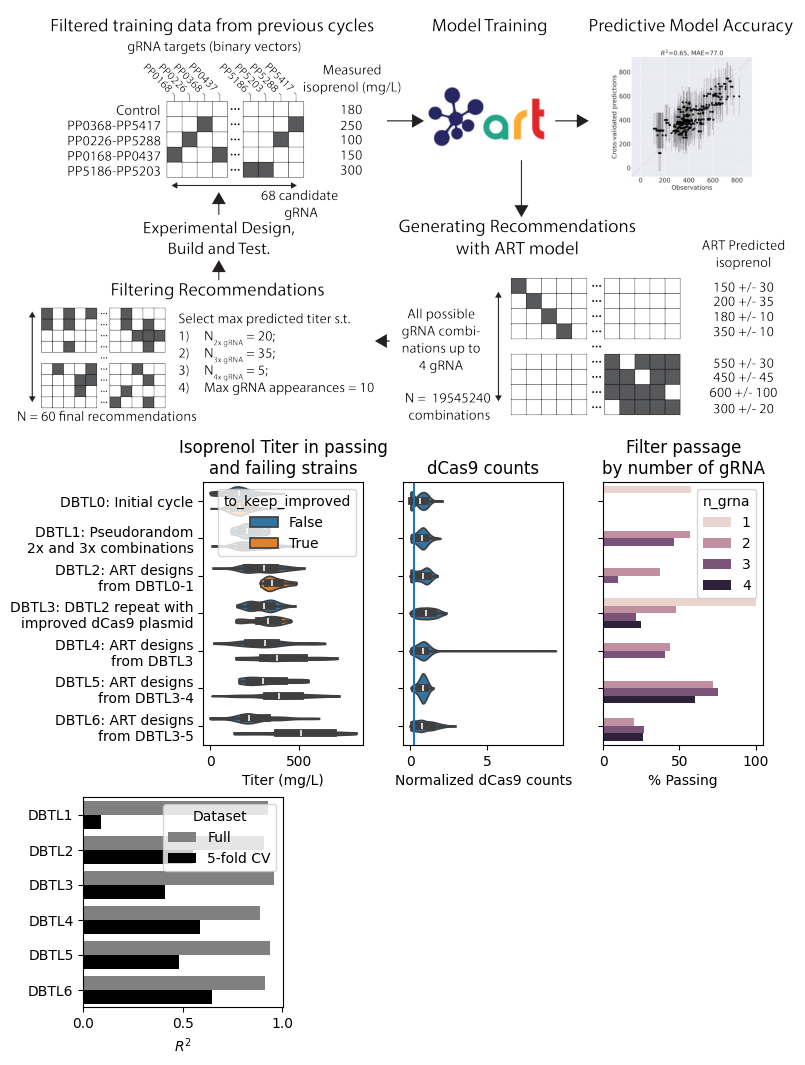

In [30]:
#Create full figure
f = plt.figure(figsize = (8, 10.5))
#Add axis for the schematic
ax_schematic = f.add_axes(
    rect = (0, .6, 1, .4), #left, bottom, width, height
    frameon = False
)
add_schematic_3A(ax_schematic)

#Add axes for other figure
ax_titer = f.add_axes(rect=(0.25, 0.30, 0.2, 0.25))
ax_dcas9 = f.add_axes(rect=(0.5, 0.30, 0.2, 0.25), sharey = ax_titer)
ax_filter = f.add_axes(rect=(0.75, 0.30, 0.2, 0.25), sharey = ax_dcas9)
ax_art_bargraph = f.add_axes(rect = (0.1, 0.05, 0.25, 0.2))
# ax_art_cv = f.add_axes(rect = (0.1, 0.05, 

#Use plotting functions to add content to each axis
add_titer_violin(df, ax_titer)
add_dcas9_violin(df, ax_dcas9)
add_filter_bargraph(ax_filter)
add_art_performance_bargraph(art_perf_df_melt, ax_art_bargraph)

f.savefig('FIGURE3.png')
plt.show()

In [ ]:
fig = plt.figure(figsize=(3, 3), linewidth=1, edgecolor='black')
fig.text(.2, .7, "plain text: alpha > beta")
fig.text(.2, .5, "Mathtext: $\\alpha > \\beta$")
fig.text(.2, .3, r"raw string Mathtext: $\alpha > \beta$")
plt.show()

In [ ]:

f.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)  # Fixing random state for reproducibility.

# create some data to use for the plot
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000] / 0.05)  # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)] * dt  # colored noise

fig, main_ax = plt.subplots()
main_ax.plot(t, s)
main_ax.set_xlim(0, 1)
main_ax.set_ylim(1.1 * np.min(s), 2 * np.max(s))
main_ax.set_xlabel('time (s)')
main_ax.set_ylabel('current (nA)')
main_ax.set_title('Gaussian colored noise')

# this is an inset Axes over the main Axes
right_inset_ax = fig.add_axes([.65, .6, .2, .2], facecolor='k')
right_inset_ax.hist(s, 400, density=True)
right_inset_ax.set(title='Probability', xticks=[], yticks=[])

# this is another inset Axes over the main Axes
left_inset_ax = fig.add_axes([.2, .6, .2, .2], facecolor='k')
left_inset_ax.plot(t[:len(r)], r)
left_inset_ax.set(title='Impulse response', xlim=(0, .2), xticks=[], yticks=[])

plt.show()